<a href="https://colab.research.google.com/github/fac3lessd0ge/MTUCI_algo/blob/main/Lab/Lab1_BVT2002_GarmashAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Выполнил студент группы БВТ2002 Гармаш Арсений Евгеньевич


## Задание 1

In [ ]:
print('Hello, World!')

Hello, World!


## Задание 2
Написать генератор случайных матриц(многомерных), который принимает <br>
опциональные параметры **m, n, min_limit, max_limit**, где **m** и **n** указывают размер <br>
матрицы, а **min_lim** и **max_lim** - минимальное и максимальное значение для <br>
генерируемого числа . По умолчанию при отсутствии параметров принимать следующие <br>
значения: <br>
m = 50 <br>
n = 50 <br>
min_limit = -250 <br>
max_limit = 1000 + (номер своего варианта)

Ни малейшего понятия не имею, какой у меня вариант, но по списку я 6-й, так что..

### Решение без библиотек

In [ ]:
from random import randint

In [ ]:
def trivial_matrix(min_limit = -250, max_limit = 1006, size = (50, 50)):
    """
    Returns matrix where the values are random integers between 
    min_limit and max_limit
    """
    result = []
    for i in range(size[0]):
        row = []
        for j in range(size[1]):
            row.append(randint(min_limit, max_limit))
        result.append(row)
    return result

In [ ]:
def print_matrix(matrix):
    print('\n'.join([''.join(['{:5}'.format(item) for item in row]) for row in matrix]))

In [ ]:
sample = trivial_matrix()

print('---------------------')
print(f'Matrix size: ({len(sample)}, {len(sample[0])})\n')
print(f'Maximum: {max(map(max, sample))} | Minimum: {min(map(min, sample))}')
print('---------------------\n')

print_matrix(sample)

---------------------
Matrix size: (50, 50)

Maximum: 1005 | Minimum: -250
---------------------

  160  147 -103  167  414  437  555 1001  219  935  478  880  657  141  633  325  406  233  218  821 -146  674 -191  307  275  690  567  279  751   72  292  450   56   48  905  428  447 -233 1003  691  569  825 -115  283  807 -136  276  139  374  -83
  278  265  697 -110  859   81  594  496  591  633  178  219  383  472   19  872  101  290 -233 -215  748  771 -177  773  372  863  493   92  840  553  990  814  178   25  482  427  393  558  603  828  655 -161  611  156  739  948  107   97  548  644
  547  176  137   48    5  927  348  375  579  807  229  407 -111 -189 -194  -52  978  980 1004  408  921  813  493  665  547  856   94   10   64 -230  393  -33  120  227 -172  -20  227  849  760  126  947 -172  284  138 -105  309  860  533  997  -92
  689  923 -106 -215 -209  137   62  841  229   89  806  328  641  406  115  258  198  710  964  889  992  947  488  917  740  865  156  720   13  39

### Решение с помощью NumPy

In [ ]:
import numpy

In [ ]:
def numpy_array(min_limit = -250, max_limit = 1006, size = (50, 50)):
    return numpy.random.randint(min_limit, max_limit, size)

In [ ]:
sample2 = numpy_array()

print('---------------------')
print(f'Matrix size: ({len(sample2)}, {len(sample2[0])})\n')
print(f'Maximum: {max(map(max, sample2))} | Minimum: {min(map(min, sample2))}')
print('---------------------\n')


print_matrix(sample2)

---------------------
Matrix size: (50, 50)

Maximum: 1005 | Minimum: -250
---------------------

  235 -220  673  846   52 -146  303  625  527  359   61   25  179  580    7  880  210  857  884   27  650  131  598  756   87   63  -37   44  309  266  166  213 -177  775  -94  489  614  402  658  613  111  356  346 -165 -185  525  757  340  403  828
  696  469  786  783  184  337  480  559  780  662  677  936  800  391   22  301  -23  767  760  -15  210 -190  150  342  139  614  786  430 -238  759  792 -116  335  570  153  173  157  393  317  599  459  597  718   -1 -138  156   63  -71  -89 -112
  958  -53 -246  996  326  -76  -18 -112  462  760  184  703   15  159  794  544  951 -150   60  892  996   48  652  584  317    1  421    2   17   77  621   99  620  787  827  781 -155  -68 -137   -3  891  211  -80  158 -242  -94 -136 -144 -213  315
 -117  401 -223  888  745 -169  737  732  138  689  370  210  837  578  491 -181  649  -60 -210  828 -169  -10  695  521  -22  608 -220  894  750  72

## Задание 3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

Методы:
*   Выбором
*   Вставкой
*   Обменом 
*   Шелла
*   Турнирная
*   Быстрая сортировка
*   Пирамидальная



### Сортировка выбором

In [ ]:
def selection_sort(li):
    for i in range(len(li)):
        min_ind = i

        for j in range(i, len(li)):
            if li[min_ind] > li[j]:
                li[min_ind], li[j] = li[j], li[min_ind]

    return li

In [ ]:
def selection_sort_matrix(matrix):
    for row in matrix:
        selection_sort(row)

    return matrix

### Сортировка вставкой

In [ ]:
def insertion_sort(li, step: int = 1):
    length = len(li)
    if length <= 1: return li

    start_index = step
    for i in range(start_index, length, step):
        j = i

        while j > 0 and li[j-step] > li[j]:
            li[j-step], li[j] = li[j], li[j-step]
            j -= step
    return li

In [ ]:
def insertion_sort_matrix(matrix, step: int = 1):
    for row in matrix:
        insertion_sort(row, step)
    return matrix

### Сортировка обменом
Сортировка обменом - термин довольно широкий. Однако тут я реализую пожалуй самый популярный вид сортировки обменом - пузырьковую

In [ ]:
def bubble_sort(li):
    n = len(li)
    if n <= 1: return li

    while True:
        swapped = False

        for i in range(1, n):
            if li[i-1] > li[i]:
                li[i-1], li[i] = li[i], li[i-1]
                swapped = True
            
        n -= 1
        if not swapped: break

    return li

In [ ]:
def bubble_sort_matrix(matrix):
    for row in matrix:
        bubble_sort(row)
    return matrix

### Сортировка Шелла


In [ ]:
def shell_sort(li):
    n = len(li)
    step = n // 2

    while step > 0:
        for i in range(step, n):
            j = i
            delta = j - step
            while delta >= 0 and li[delta] > li[j]:
                li[delta], li[j] = li[j], li[delta]
                j = delta
                delta = j - step
        step //= 2
    return li

In [ ]:
def shell_sort_matrix(matrix):
    for row in matrix:
        shell_sort(row)
    return matrix

## Быстрая сортировка

In [ ]:
##def quick_sort(li) -> list:


## Турнирная сортировка

In [ ]:
class PriorityHeap():

    def min_heapify(self, li: list, n: int, _current: int) -> list:
        current = _current
        right = 2 * _current + 2
        left = 2 * _current + 1

        if right < n and li[right] < li[current]:
            current = right
        if left < n and li[left] < li[current]:
            current = left
        if current != _current:
            li[_current],li[current] = li[current],li[_current]
            self.min_heapify(li, n, current)
        return li

    def update_queue(self, queue: list):
        for i in range(len(queue) // 2 - 1, -1, -1):
            self.min_heapify(queue, len(queue), i)  

    def __init__(self, array = []):
        if len(array) == 0 or len(array) == 1:
            self.queue = array
            return

        self.start = array.copy()
        self.queue = self.start.copy()
        
        self.update_queue(self.queue)

    def __str__(self):
        return f'[{", ".join(map(lambda x: str(x), self.queue))}]'

    def pop(self, index: int):
        temp = self.queue.pop(index)
        self.update_queue(self.queue)
        return(temp)
    
    @property
    def length(self):
        return len(self.queue)

    def add(self, value: int):
        self.queue.append(value)
        self.update_queue(self.queue)

In [ ]:
import heapq

In [330]:
def tournament_sort_heapq(li: list) -> list:

    length = len(li)

    winners = []
    losers = []

    queue = []
    while len(queue) < 15 and len(li) >= 0:
        heapq.heappush(queue, li.pop(0))

    while len(li) != 0:

        if len(winners) == 0:
            winners.append(heapq.heappop(queue))

        if li[0] > winners[-1]:
            heapq.heappush(queue, li.pop(0))
        else:
            losers.append(li.pop(0))

        #if len(queue) != 0: winners.append(heapq.heappop(queue))
        
    print(len(queue))
    while len(queue) != 0:
        winners.append(heapq.heappop(queue))

    if len(losers) == 0: return winners
    else:

        print(f'los: {losers}')
        print(f'win: {winners}')
        li = losers + winners
        return tournament_sort_heapq(li)

In [307]:
def tournament_sort(li: list) -> list:

    length = len(li)

    winners = []
    losers = []

    queue = PriorityHeap()
    while queue.length < 15 and len(li) >= 0:
        queue.add(li.pop(0))

    while len(li) != 0:

        if len(winners) == 0:
            winners.append(queue.pop(0))

        if li[0] > winners[-1]:
            queue.add(li.pop(0))
        else:
            losers.append(li.pop(0))

        if queue.length != 0: winners.append(queue.pop(0))
        
    while queue.length != 0:
        winners.append(queue.pop(0))

    if len(losers) == 0: return winners
    else:



        li = losers + winners
        return tournament_sort(li)

In [ ]:
import random

In [ ]:
import time

In [337]:
test = [random.randint(0, 100_000) for n in range(30)]

a1 = time.time()
print(tournament_sort_heapq(test))
b1 = time.time()
print(b1-a1)


28
los: [564]
win: [5150, 8140, 9096, 9769, 13088, 13353, 18038, 19442, 21439, 25326, 29088, 33013, 33596, 38465, 40147, 42244, 50814, 56413, 57135, 59490, 61543, 67717, 73458, 82597, 86478, 89178, 90834, 91717, 94130]
29
[564, 5150, 8140, 9096, 9769, 13088, 13353, 18038, 19442, 21439, 25326, 29088, 33013, 33596, 38465, 40147, 42244, 50814, 56413, 57135, 59490, 61543, 67717, 73458, 82597, 86478, 89178, 90834, 91717, 94130]
0.00023865699768066406


##Пирамидальная сортировка

In [ ]:
def heapify(li: list, n: int, _largest: int) -> list:
    largest = _largest
    right = 2 * _largest + 2
    left = 2 * _largest + 1

    if right < n and li[right] > li[largest]:
        largest = right

    if left < n and li[left] > li[largest]:
        largest = left
    
    if largest != _largest:
        li[_largest],li[largest] = li[largest],li[_largest]
        heapify(li, n, largest)

    return li

In [ ]:
def heap_sort(li) -> list:
    n = len(li)

    for i in range(n // 2 - 1, -1, -1):
        heapify(li, n, i)
    
    for i in range(n-1, 0, -1):
        li[i], li[0] = li[0], li[i]
        heapify(li, i, 0)

    return li


In [ ]:
test = [random.randint(0, 10_000) for n in range(100000)]

a = time.time()
print(heap_sort(test))
b = time.time()

print(b-a)

In [ ]:
def heap_sort_matrix(matrix):
    for row in matrix:
        heap_sort(row)
    return matrix

In [ ]:
arr = [ 12, 11, 13, 5, 6, 7]
heap_sort(arr)
n = len(arr)
print ("Sorted array is")
arr

Sorted array is


[5, 6, 7, 11, 12, 13]

### Тесты сортировок

In [ ]:
import time

In [ ]:
class SortingError(Exception):
    pass

def sort_n_test(matrix, method : str = 'selection', print_result = True):

    methods = {
        'selection': selection_sort_matrix,
        'insertion': insertion_sort_matrix,
        'bubble': bubble_sort_matrix,
        'shell': shell_sort_matrix,
        'heap': heap_sort_matrix
    }
    a = time.time()
    sorted = methods[method](matrix)
    b = time.time()


    print(f'\nEscalated time: {b - a}\n\n')
    if print_result: print_matrix(sorted)

    for row in sorted:
        for i in range(1, len(row)):
            if row[i] < row[i-1]:
                raise SortingError("Something's wrong!")

    print('\n\n---------------')
    print('Test passed!')
    print('---------------')

    #return sorted

In [ ]:
def test_complexity(method : str = 'selection') -> list:
    results = []

    methods = {
        'selection': selection_sort_matrix,
        'insertion': insertion_sort_matrix,
        'bubble': bubble_sort_matrix,
        'shell': shell_sort_matrix,
        'heap': heap_sort_matrix
    }
    

    dimensions = [25 * (2 * i - 1) for i in range(1, 4000, 50)]

    for i in dimensions:
        test_mat = trivial_matrix(size = (1, i))

        a = time.time()
        sorted = methods[method](test_mat)
        b = time.time()

        results.append(b - a)

    return results


In [ ]:
import seaborn as sns 
import numpy as np

In [ ]:
dimensions = [25 * (2 * i - 1) for i in range(1, 4000, 50)]

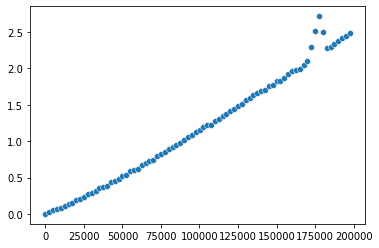

In [ ]:
sns.scatterplot(x = dimensions, y = np.array(test_complexity('heap'))) 

In [ ]:
def test_times() -> list:
    methods = {
        'selection': selection_sort,
        'insertion': insertion_sort,
        'bubble': bubble_sort,
        'shell': shell_sort,
        'heap': heap_sort
    }

    results = []

    test_matrix = trivial_matrix(size=(100000, 1))[0]
    for i in methods.keys():
        a = time.time()
        sorted = methods[i](test_matrix)
        b = time.time()

        results.append((i, b-a))

    return results    



In [ ]:
test_samples = trivial_matrix()

print('\n\n-------------------')
print('Generated matrix')
print('-------------------\n\n')

print_matrix(test_samples[0:4])

print('\n\n-------------------')
print('Sorted matrix')
print('-------------------\n\n')

sort_n_test(test_samples.copy(), method = 'heap')



-------------------
Generated matrix
-------------------


   83  924  321  860  418  360  692  691  558  299  305   57  220  167 -233 -176  735  360 -146  177  240 -220   94  124  670 -190  -61 -238  305  731  988  418 -247  -64  536  354  868  447  802  779 -223  677  250  599  924  133    1   29   -2  863
  -13  517  469  196  826  587  939  374  895  303  400  507  376  609  832  488  215   89 -136  608  332  -42  667 -224  450 -172   87  665  837  -45  965  270 -161  707  915  905  319  -49  411  235  157  896  372 -220  327  353  243  769  255  692
  -52 -189  240  423  852  779   96 -197 -248  187   88   65  975  226  942  721  635  217  579   26  612  133  716  915  -40  396  134  412  251  595  318  130  527  468  169  836  251  -66 -155  160  233  266  -60 -181   51 -250  899  733   39  615
  911  924 -199  497  382  901 -180  430   21  668  360  346  984  510  -16  480  950  950  697   34 -135  692 -118  943 -167  711  808  489  711   53  518  781  722  733 -245  977   35 

In [ ]:
print(test_times())

KeyboardInterrupt: ignored